In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline


In [9]:
# Update the path if needed
data_path ="/Users/laporchiadavis/Desktop/SACS-Updated Capstone BurnCare Dataset & Images/Capstone Flow/Burn Coding Clean Datasets/Burn Coding Clean Dataset/burncare_cleaned_dataset (1).csv"

burn_df = pd.read_csv(data_path)
burn_df.head()
# Display basic information about the dataset

,patient_id,age,gender,burn_depth,injury_cause,initial_surgery,material_used,material_type,material_breathability,material_elasticity,...,second_surgery_binary,burn_severity_index,comorbidity_score,has_fracture,fracture_count,has_osteomyelitis,bone_density_loss,bone_erosion_extent,bone_damage_score,calcium_deposition
0,P1003,36,Male,Superficial,Chemical,2024-08-19,SmartFabricX,Hybrid,Medium,1,...,0,24,2,0,0,0,0,0,0,0
1,P1326,31,Male,Superficial,Electrical,2024-10-04,Cotton,Natural,Low,0,...,0,27,2,1,3,0,0,0,4,0
2,P1290,41,Female,Superficial,Fire,2025-02-19,Cotton,Natural,Medium,0,...,0,7,1,0,0,0,0,0,0,0
3,P1462,42,Male,Superficial,Scald,2024-08-16,SmartFabricX,Hybrid,Low,0,...,0,11,0,0,0,0,0,0,1,0
4,P1080,38,Male,Superficial,Fire,2024-11-12,SmartFabricX,Hybrid,High,0,...,0,8,0,0,0,0,0,0,1,0


In [10]:
burn_df.info()
burn_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1538 entries, 0 to 1537
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   patient_id                   1538 non-null   object
 1   age                          1538 non-null   int64 
 2   gender                       1538 non-null   object
 3   burn_depth                   1538 non-null   object
 4   injury_cause                 1538 non-null   object
 5   initial_surgery              1538 non-null   object
 6   material_used                1538 non-null   object
 7   material_type                1538 non-null   object
 8   material_breathability       1538 non-null   object
 9   material_elasticity          1538 non-null   int64 
 10  antimicrobial_coated         1538 non-null   object
 11  second_surgery               1538 non-null   int64 
 12  time_to_second_surgery_days  1538 non-null   int64 
 13  hospital_stay_days           1538

,age,material_elasticity,second_surgery,time_to_second_surgery_days,hospital_stay_days,bmi,previous_hospital_visits,pain_level_at_admission,material_thermal_resistance,material_absorbency,...,second_surgery_binary,burn_severity_index,comorbidity_score,has_fracture,fracture_count,has_osteomyelitis,bone_density_loss,bone_erosion_extent,bone_damage_score,calcium_deposition
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,...,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,50.249675,0.561118,0.500000,16.700260,57.627438,26.040312,1.112484,5.593628,0.574772,0.498700,...,0.500000,35.788036,2.091027,0.251625,0.505852,0.093628,0.503251,0.238622,2.059168,0.096229
std,19.629226,0.496412,0.500163,5.239037,23.794194,3.942454,1.009242,2.826473,0.494538,0.500161,...,0.500163,23.335059,1.362490,0.434088,0.960660,0.291405,1.799748,0.870026,2.563649,0.367656
min,17.000000,0.000000,0.000000,5.000000,12.000000,13.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,0.000000,0.000000,15.000000,39.000000,23.000000,0.000000,3.000000,0.000000,0.000000,...,0.000000,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,1.000000,0.500000,17.000000,56.000000,26.000000,1.000000,6.000000,1.000000,0.000000,...,0.500000,32.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,68.000000,1.000000,1.000000,18.000000,78.000000,29.000000,2.000000,8.000000,1.000000,1.000000,...,1.000000,52.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000
max,85.000000,1.000000,1.000000,29.000000,104.000000,41.000000,4.000000,10.000000,1.000000,1.000000,...,1.000000,120.000000,7.000000,1.000000,3.000000,1.000000,10.000000,5.000000,12.000000,2.000000


Select numeric features for PCA

In [11]:
# Select only numeric features
numeric_cols = burn_df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols


['age',
 'material_elasticity',
 'second_surgery',
 'time_to_second_surgery_days',
 'hospital_stay_days',
 'bmi',
 'previous_hospital_visits',
 'pain_level_at_admission',
 'material_thermal_resistance',
 'material_absorbency',
 'material_weight',
 'material_stretch_limit',
 'admission_hour',
 'surgery_delay_days',
 'care_team_experience',
 'room_temperature',
 'second_surgery_binary',
 'burn_severity_index',
 'comorbidity_score',
 'has_fracture',
 'fracture_count',
 'has_osteomyelitis',
 'bone_density_loss',
 'bone_erosion_extent',
 'bone_damage_score',
 'calcium_deposition']

In [12]:
X = burn_df[numeric_cols].copy()
X.head()
# Standardize the data

,age,material_elasticity,second_surgery,time_to_second_surgery_days,hospital_stay_days,bmi,previous_hospital_visits,pain_level_at_admission,material_thermal_resistance,material_absorbency,...,second_surgery_binary,burn_severity_index,comorbidity_score,has_fracture,fracture_count,has_osteomyelitis,bone_density_loss,bone_erosion_extent,bone_damage_score,calcium_deposition
0,36,1,0,18,22,32,1,6,0,0,...,0,24,2,0,0,0,0,0,0,0
1,31,0,0,18,48,30,0,7,0,0,...,0,27,2,1,3,0,0,0,4,0
2,41,0,0,18,62,25,2,4,0,1,...,0,7,1,0,0,0,0,0,0,0
3,42,0,0,18,36,23,1,3,0,0,...,0,11,0,0,0,0,0,0,1,0
4,38,0,0,18,92,25,0,4,1,0,...,0,8,0,0,0,0,0,0,1,0


Standardize the features

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape of X_scaled:", X_scaled.shape)


Shape of X_scaled: (1538, 26)


Fit PCA (all components) and plot explained variance

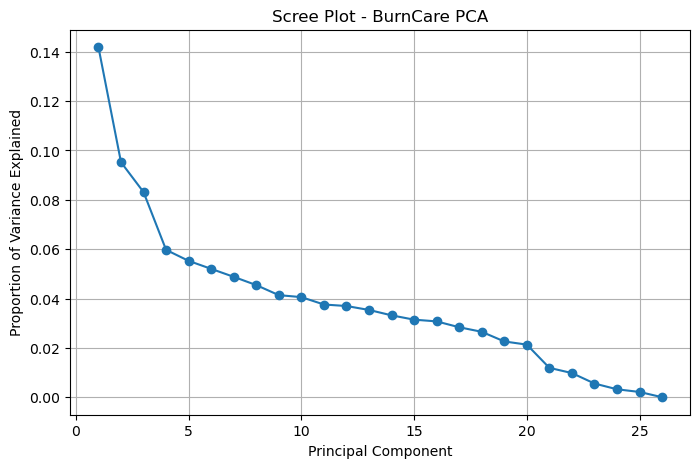

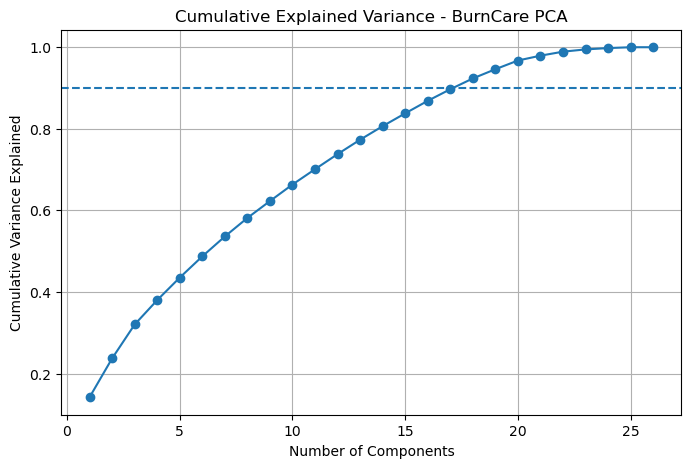

array([0.14184441, 0.23708007, 0.32020563, 0.37991716, 0.43517909,
       0.48719588, 0.53598391, 0.58142407, 0.62278967, 0.66335813,
       0.7009308 , 0.73789541, 0.77326191, 0.80644738, 0.83788075,
       0.86861474, 0.89697194, 0.92348338, 0.94608766, 0.967407  ,
       0.97930797, 0.98910028, 0.99465373, 0.99786713, 1.        ,
       1.        ])

In [14]:
# Fit PCA with all possible components
pca_full = PCA()
pca_full.fit(X_scaled)

explained_var = pca_full.explained_variance_ratio_
cum_explained_var = np.cumsum(explained_var)

# Scree plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var) + 1), explained_var, marker="o")
plt.xlabel("Principal Component")
plt.ylabel("Proportion of Variance Explained")
plt.title("Scree Plot - BurnCare PCA")
plt.grid(True)
plt.show()

# Cumulative variance plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cum_explained_var) + 1), cum_explained_var, marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Explained")
plt.title("Cumulative Explained Variance - BurnCare PCA")
plt.axhline(y=0.90, linestyle="--")  # 90% threshold
plt.grid(True)
plt.show()

cum_explained_var


Choose number of components (90% variance)

In [15]:
# Choose number of components to explain at least 90% variance
target_variance = 0.90
n_components_90 = np.argmax(cum_explained_var >= target_variance) + 1
n_components_90
# Fit PCA with the selected number of components

18

In [16]:
pca = PCA(n_components=n_components_90)
X_pca = pca.fit_transform(X_scaled)

print("Shape of X_pca:", X_pca.shape)


Shape of X_pca: (1538, 18)


In [17]:
for i in range(n_components_90):
    burn_df[f"PC{i+1}"] = X_pca[:, i]

burn_df[[*numeric_cols, "PC1", "PC2"]].head()


,age,material_elasticity,second_surgery,time_to_second_surgery_days,hospital_stay_days,bmi,previous_hospital_visits,pain_level_at_admission,material_thermal_resistance,material_absorbency,...,comorbidity_score,has_fracture,fracture_count,has_osteomyelitis,bone_density_loss,bone_erosion_extent,bone_damage_score,calcium_deposition,PC1,PC2
0,36,1,0,18,22,32,1,6,0,0,...,2,0,0,0,0,0,0,0,-0.967604,-0.791802
1,31,0,0,18,48,30,0,7,0,0,...,2,1,3,0,0,0,4,0,0.658936,2.948471
2,41,0,0,18,62,25,2,4,0,1,...,1,0,0,0,0,0,0,0,-0.928850,-0.783363
3,42,0,0,18,36,23,1,3,0,0,...,0,0,0,0,0,0,1,0,-0.845657,-0.721100
4,38,0,0,18,92,25,0,4,1,0,...,0,0,0,0,0,0,1,0,-0.800553,-0.730419


Visualize PC1 vs PC2

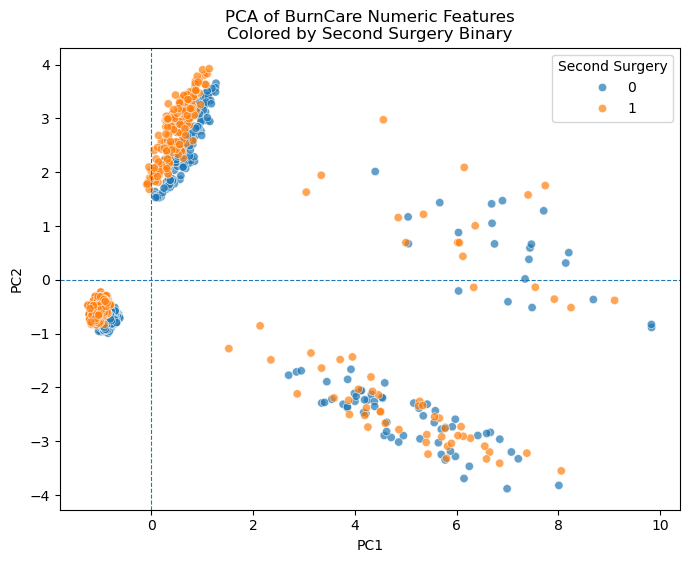

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=burn_df,
    x="PC1",
    y="PC2",
    hue="second_surgery_binary",  # 0 = no second surgery, 1 = yes
    alpha=0.7
)
plt.title("PCA of BurnCare Numeric Features\nColored by Second Surgery Binary")
plt.axhline(0, linestyle="--", linewidth=0.8)
plt.axvline(0, linestyle="--", linewidth=0.8)
plt.legend(title="Second Surgery")
plt.show()


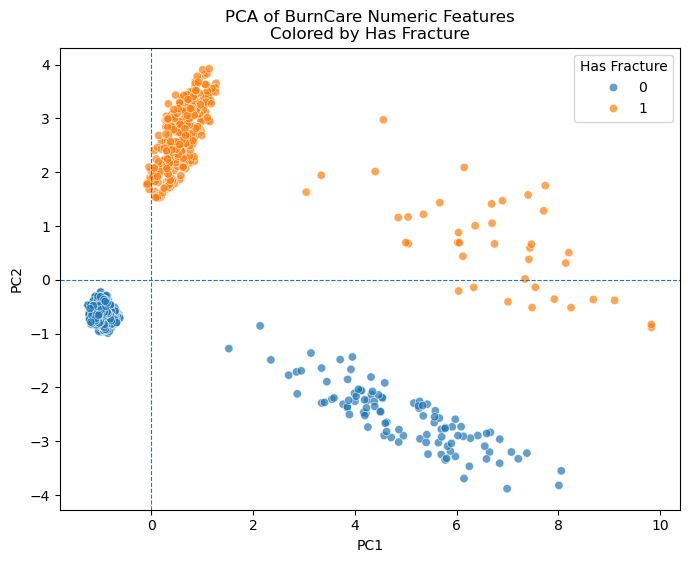

In [19]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=burn_df,
    x="PC1",
    y="PC2",
    hue="has_fracture",
    alpha=0.7
)
plt.title("PCA of BurnCare Numeric Features\nColored by Has Fracture")
plt.axhline(0, linestyle="--", linewidth=0.8)
plt.axvline(0, linestyle="--", linewidth=0.8)
plt.legend(title="Has Fracture")
plt.show()


In [20]:
# Loadings matrix: features x PCs
loadings = pd.DataFrame(
    pca.components_.T,
    index=numeric_cols,
    columns=[f"PC{i+1}" for i in range(n_components_90)]
)

loadings.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
age,0.001693,-0.011607,-0.152051,0.428588,-0.101442,0.008010,0.251410,0.101221,-0.310424,0.175900,0.027856,0.097711,0.400127,-0.148732,-0.165193,0.099745,0.129863,-0.349272
material_elasticity,-0.002537,0.018473,-0.063123,0.229516,-0.178814,0.545660,-0.016490,-0.104648,-0.336321,0.097994,0.077231,0.036581,0.112848,-0.067411,-0.272419,-0.169563,0.019642,0.319381
second_surgery,-0.045991,0.046687,0.637626,0.163090,-0.086792,-0.086993,0.114007,0.023111,-0.015780,-0.108296,-0.049862,0.044432,-0.007796,0.009450,-0.057412,-0.039264,0.050849,-0.017619
time_to_second_surgery_days,-0.004773,-0.060358,-0.070007,0.372901,0.086074,0.032168,-0.083269,-0.339833,-0.203510,-0.016755,-0.337645,-0.286429,-0.408863,0.048725,0.164396,-0.137688,-0.368271,-0.154990
hospital_stay_days,-0.012463,-0.018375,-0.076423,0.071806,0.036542,-0.455534,0.043430,-0.341272,-0.289814,-0.164176,-0.051845,0.462528,0.153682,0.052903,-0.071383,0.062202,-0.379569,0.112913


In [21]:
# Sort features by absolute contribution to PC1
print("Top features for PC1:")
display(loadings["PC1"].sort_values(key=np.abs, ascending=False).head(10))

print("\nTop features for PC2:")
display(loadings["PC2"].sort_values(key=np.abs, ascending=False).head(10))


Top features for PC1:


has_osteomyelitis           0.472472
bone_density_loss           0.442467
bone_erosion_extent         0.435687
calcium_deposition          0.426364
bone_damage_score           0.364529
has_fracture                0.190730
fracture_count              0.181953
second_surgery             -0.045991
second_surgery_binary      -0.045991
previous_hospital_visits   -0.027543
Name: PC1, dtype: float64


Top features for PC2:


has_fracture                   0.576225
fracture_count                 0.564877
bone_damage_score              0.415553
has_osteomyelitis             -0.213418
bone_density_loss             -0.203947
bone_erosion_extent           -0.198217
calcium_deposition            -0.193242
time_to_second_surgery_days   -0.060358
second_surgery_binary          0.046687
second_surgery                 0.046687
Name: PC2, dtype: float64

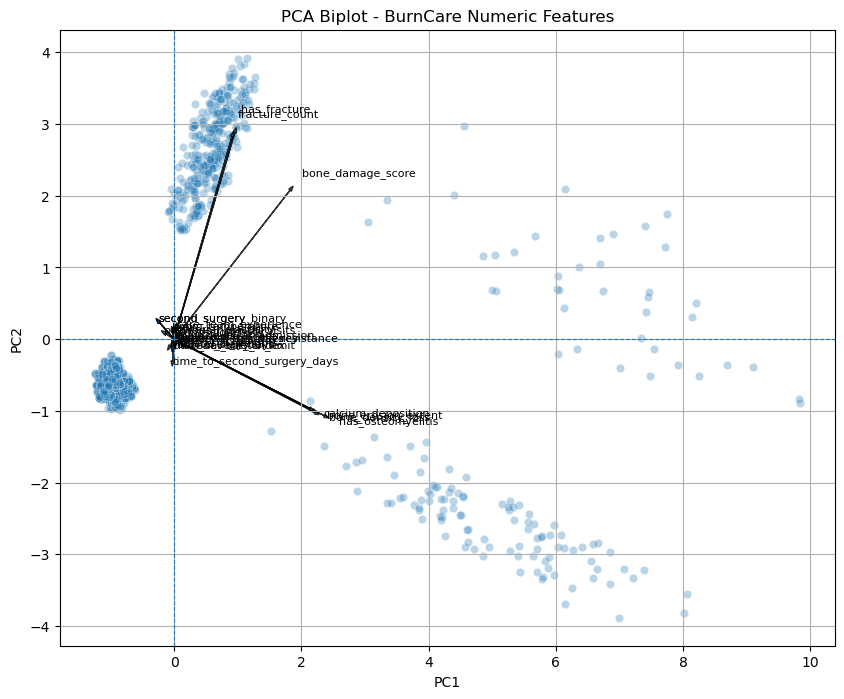

In [22]:
plt.figure(figsize=(10, 8))

# Scores
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    alpha=0.3
)

# Loadings (scaled for visualization)
for i, feature in enumerate(numeric_cols):
    plt.arrow(0, 0,
              loadings.iloc[i, 0]*5,  # scale factor
              loadings.iloc[i, 1]*5,
              head_width=0.05, alpha=0.8)
    plt.text(loadings.iloc[i, 0]*5*1.1,
             loadings.iloc[i, 1]*5*1.1,
             feature,
             fontsize=8)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Biplot - BurnCare Numeric Features")
plt.axhline(0, linestyle="--", linewidth=0.8)
plt.axvline(0, linestyle="--", linewidth=0.8)
plt.grid(True)
plt.show()


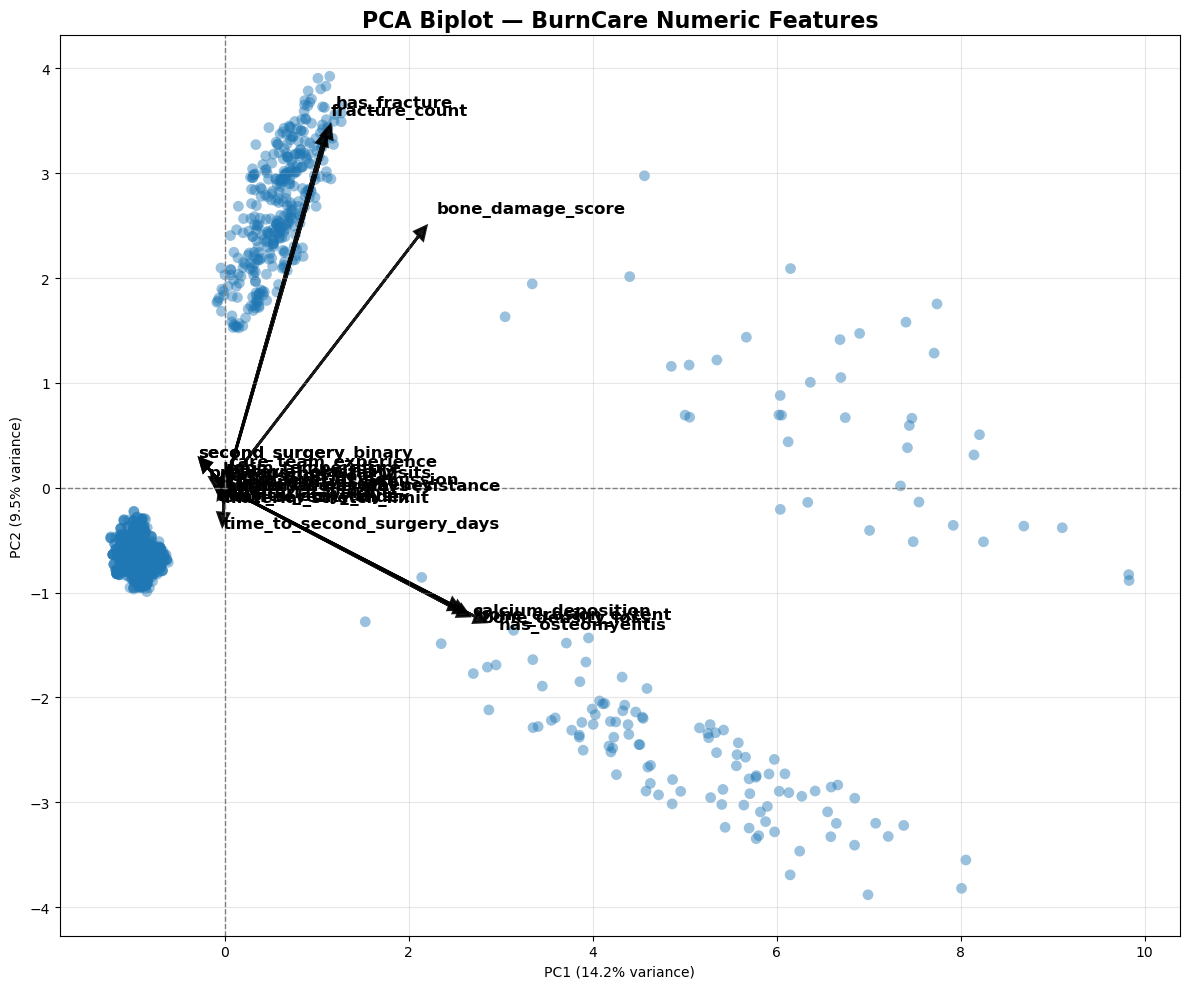

In [23]:
plt.figure(figsize=(12, 10))

# Scatterplot of PC1 vs PC2
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    alpha=0.45,
    s=60,
    edgecolor='none'
)

# Style: horizontal/vertical axis lines
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)

# Vector scaling so that arrows are visible
vector_scale = 6

for i, feature in enumerate(numeric_cols):
    x_vec = loadings.iloc[i, 0] * vector_scale
    y_vec = loadings.iloc[i, 1] * vector_scale

    # Draw arrow
    plt.arrow(
        0, 0,
        x_vec, y_vec,
        head_width=0.12,
        head_length=0.12,
        linewidth=2,
        color='black',
        alpha=0.9,
        length_includes_head=True
    )

    # Place label slightly offset from arrow tip
    plt.text(
        x_vec * 1.05,
        y_vec * 1.05,
        feature,
        fontsize=12,
        weight='bold',
        color="black"
    )

plt.title("PCA Biplot — BurnCare Numeric Features", fontsize=16, weight='bold')
plt.xlabel(f"PC1 ({explained_var[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({explained_var[1]*100:.1f}% variance)")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


Numeric clinical and material features (26 variables including age, BMI, burn severity index, comorbidity score, material properties, and bone damage indicators) were standardized (zero mean, unit variance) and subjected to principal component analysis (PCA). Components explaining at least 90% of the total variance were retained. PC scores were used to visualize patient clustering and to explore the relationship between burn severity, second surgery status, and bone injury measures.

In [24]:
# Compute absolute contribution to PC1 and PC2
loadings["abs_PC1"] = loadings["PC1"].abs()
loadings["abs_PC2"] = loadings["PC2"].abs()

# Rank features by strongest influence on first 2 PCs combined
loadings["combined"] = loadings["abs_PC1"] + loadings["abs_PC2"]

# Select top N features to plot (8 is best for readability)
top_features = loadings.sort_values("combined", ascending=False).head(8)
top_features


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,abs_PC1,abs_PC2,combined
bone_damage_score,0.364529,0.415553,-0.002619,0.016881,-0.008543,-0.019199,-0.014544,-0.013919,-0.014469,-0.013947,...,0.015927,-0.005563,-0.014310,0.018179,0.000360,-0.007739,-0.018985,0.364529,0.415553,0.780082
has_fracture,0.190730,0.576225,-0.028064,0.003057,0.004015,-0.003759,-0.008975,-0.016020,-0.021960,0.000614,...,-0.007688,-0.016898,-0.014265,0.029162,-0.002928,-0.005843,-0.019411,0.190730,0.576225,0.766956
fracture_count,0.181953,0.564877,-0.030690,0.001781,-0.013719,-0.005668,-0.002808,-0.020374,-0.015214,-0.005877,...,-0.012215,-0.019515,0.003586,0.023424,-0.005790,-0.030945,-0.008835,0.181953,0.564877,0.746830
has_osteomyelitis,0.472472,-0.213418,0.045134,0.003228,-0.008417,-0.003103,-0.009358,0.006453,-0.011578,0.010175,...,0.007212,-0.011872,0.014360,-0.034030,-0.008362,0.002047,0.001757,0.472472,0.213418,0.685890
bone_density_loss,0.442467,-0.203947,0.041851,-0.006891,-0.018120,0.001619,0.004361,-0.002443,0.001925,0.017194,...,-0.029898,0.004215,-0.003085,0.007027,0.002655,0.012540,0.007869,0.442467,0.203947,0.646414
bone_erosion_extent,0.435687,-0.198217,0.040660,0.018839,-0.010298,-0.010444,0.006544,-0.029555,-0.020509,0.002445,...,0.007325,-0.007258,0.003029,-0.039591,-0.030486,0.012566,-0.024198,0.435687,0.198217,0.633904
calcium_deposition,0.426364,-0.193242,0.043270,-0.019110,-0.015209,-0.008190,-0.008834,0.047777,0.000255,0.002749,...,0.039674,-0.006476,0.006339,0.003664,0.017308,0.000802,0.044982,0.426364,0.193242,0.619607
second_surgery_binary,-0.045991,0.046687,0.637626,0.163090,-0.086792,-0.086993,0.114007,0.023111,-0.015780,-0.108296,...,0.044432,-0.007796,0.009450,-0.057412,-0.039264,0.050849,-0.017619,0.045991,0.046687,0.092678


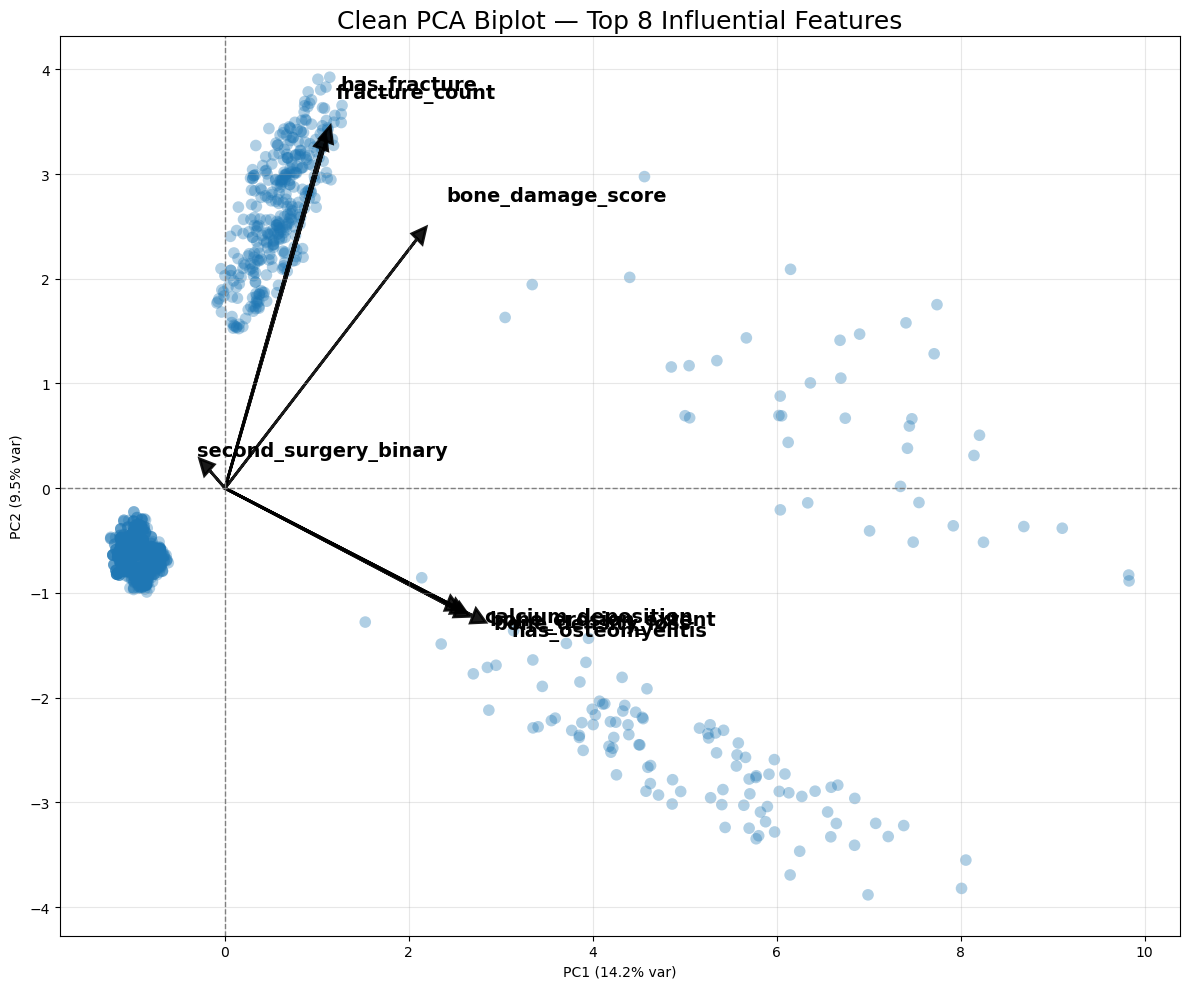

In [25]:
plt.figure(figsize=(12, 10))

sns.scatterplot(
    x=X_pca[:, 0], 
    y=X_pca[:, 1],
    alpha=0.35, s=70, edgecolor='none'
)

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)

vector_scale = 6

for feature in top_features.index:
    x_vec = loadings.loc[feature, "PC1"] * vector_scale
    y_vec = loadings.loc[feature, "PC2"] * vector_scale

    plt.arrow(
        0, 0,
        x_vec, y_vec,
        head_width=0.15,
        head_length=0.15,
        linewidth=2,
        color='black',
        alpha=0.9,
        length_includes_head=True
    )

    plt.text(
        x_vec * 1.1,
        y_vec * 1.1,
        feature,
        fontsize=14,
        weight='bold'
    )

plt.title("Clean PCA Biplot — Top 8 Influential Features", fontsize=18)
plt.xlabel(f"PC1 ({explained_var[0]*100:.1f}% var)")
plt.ylabel(f"PC2 ({explained_var[1]*100:.1f}% var)")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


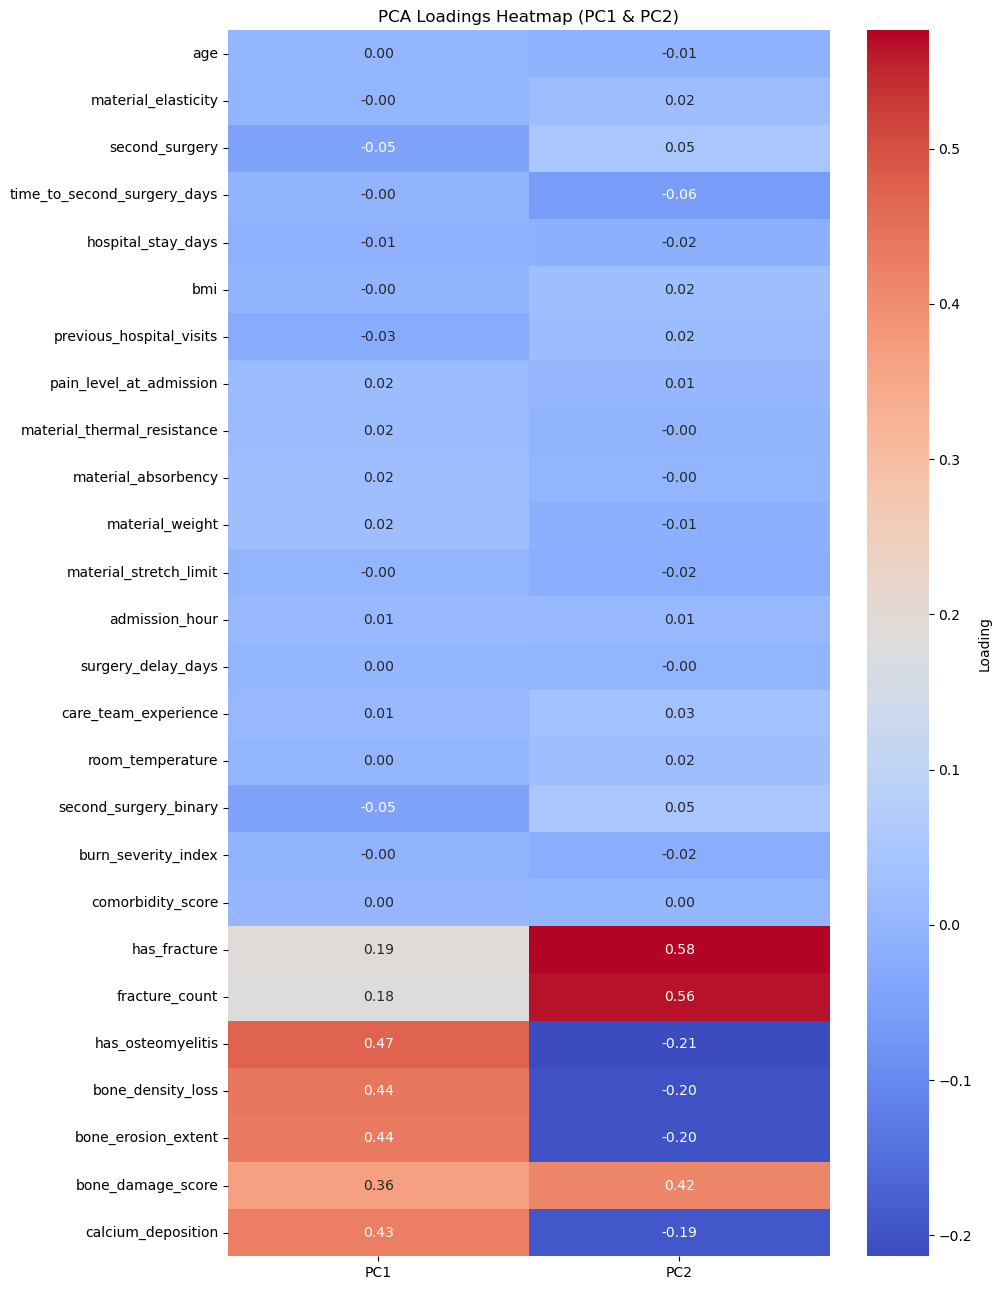

In [26]:
plt.figure(figsize=(10, len(loadings)/2))

sns.heatmap(
    loadings[["PC1", "PC2"]],
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    cbar_kws={'label': 'Loading'}
)

plt.title("PCA Loadings Heatmap (PC1 & PC2)")
plt.tight_layout()
plt.show()


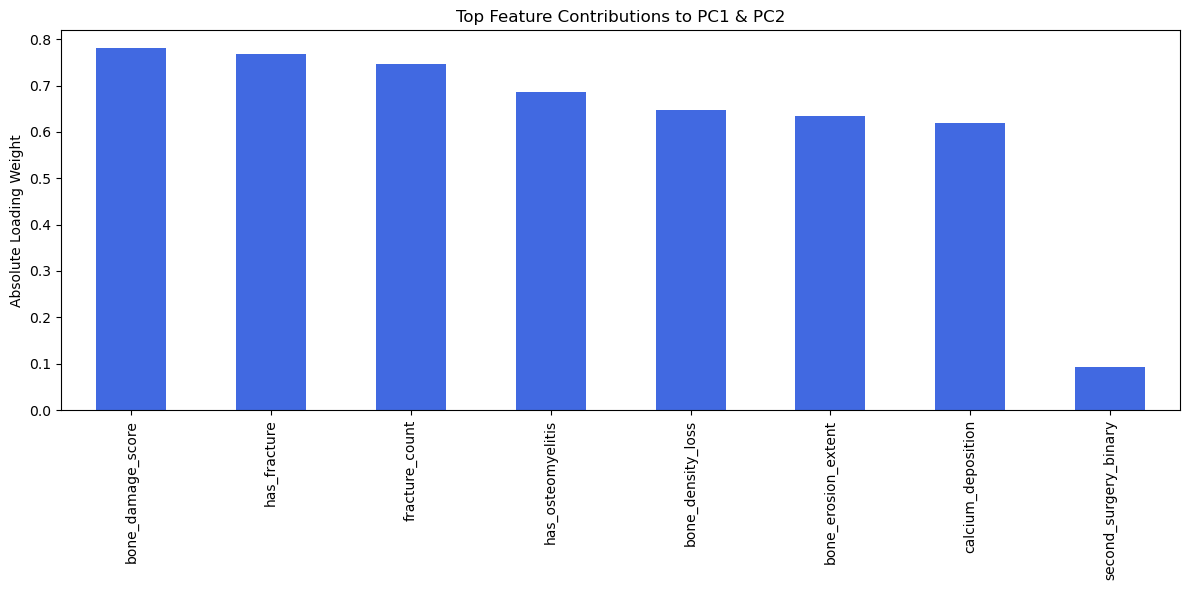

In [27]:
plt.figure(figsize=(12, 6))

top_features["combined"].sort_values(ascending=False).plot(
    kind="bar",
    color="royalblue"
)

plt.title("Top Feature Contributions to PC1 & PC2")
plt.ylabel("Absolute Loading Weight")
plt.tight_layout()
plt.show()
